# Problem Statement

Due to substantial cancellation rates, the owners of the City Hotel and Resort Hotel is witnessing a notable decline in guest bookings, resulting in numerous unoccupied rooms that are significantly affecting the business.

In this project, I thoroughly examined the cancellation rate for two hotel bookings and presented valuable insights through the utilization of graphs and recommendations. My intention was to provide the necessary information to facilitate optimal decision-making.

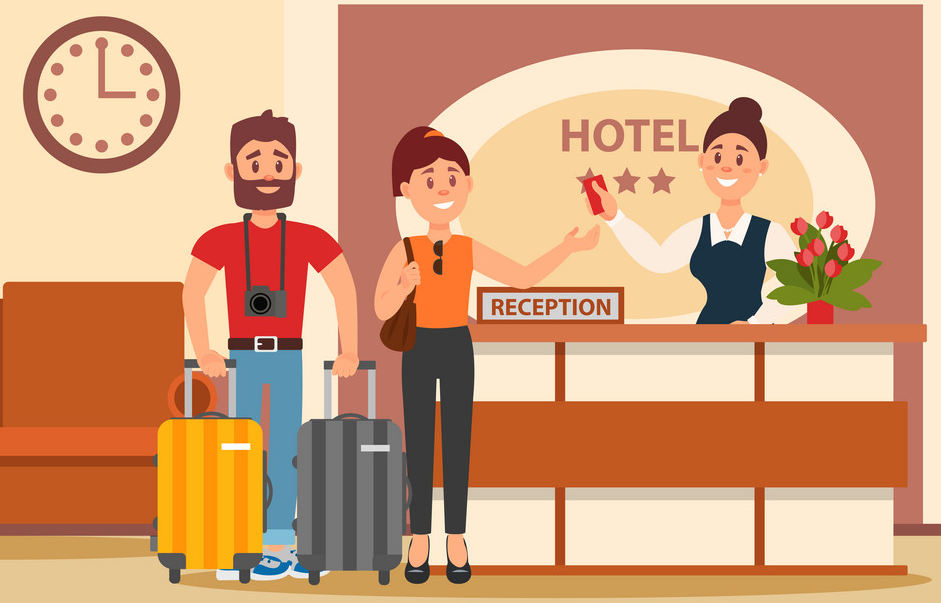

I will have to help the Hotel owners to address this issue using data analysis and provide possible solutions to problems like:
1. What are the key factors that contribute to hotel reservation cancellations?
2. What strategies can be implemented to enhance the management of hotel reservation cancellations?
3. In what ways can hotels receive support in making pricing and promotion decisions?

# Data Preprocessing 

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data-set
data = pd.read_csv('hotel_booking.csv')

In [3]:
# Observing first 5 records of the data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
# Checking for duplicate records
data[data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


In [5]:
# Checking for null values
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# Checking for total number of rows and columns in this data
data.shape

(119390, 36)

In [7]:
# Dropping the columns that have high null values as they are not a part of our Analysis
data.drop(columns = ['agent', 'company'], inplace = True)

In [8]:
# Drop records having few null values
data = data.dropna()
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
# Checking for data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [10]:
# Changing the data type of reservation_status_date column to datetime dtype
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [11]:
print(data['reservation_status_date'].dtype)

datetime64[ns]


In [12]:
# Checking statistics of quantitative columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


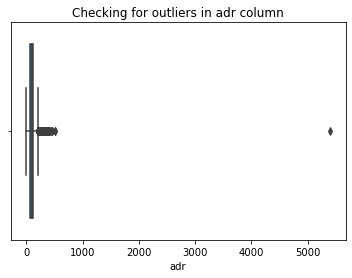

In [13]:
# Checking for outliers
sns.boxplot(data['adr'])
plt.title('Checking for outliers in adr column')
plt.show()

In [14]:
# Removing outliers
data = data[data['adr']<5000]

In [15]:
# Checking statistics of qualitative columns
data.describe(include = object).T

,count,unique,top,freq
hotel,118897,2,City Hotel,79301
arrival_date_month,118897,12,August,13852
meal,118897,5,BB,91862
country,118897,177,PRT,48585
market_segment,118897,7,Online TA,56402
distribution_channel,118897,5,TA/TO,97729
reserved_room_type,118897,10,A,85600
assigned_room_type,118897,12,A,73862
deposit_type,118897,3,No Deposit,104163
customer_type,118897,4,Transient,89173


In [16]:
# Finding unique values under few qualitative columns
columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
        'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

for col in columns:
    print(col)
    print(data[col].unique())
    print('-------------------------------------------------------------------------------------------------------------')

hotel
['Resort Hotel' 'City Hotel']
-------------------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-------------------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-------------------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN'

# Exploratory Data Analysis and Data Visualization

In [17]:
# Total count of cancelled booking
data['is_canceled'].value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

In [18]:
# Total rate of cancellation
data['is_canceled'].value_counts(normalize = True)

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

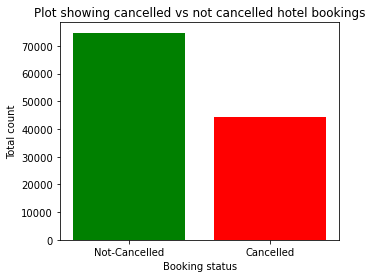

In [19]:
# Plot showing cancelled vs not cancelled hotel bookings
plt.figure(figsize = (5,4))
plt.bar(x = ['Not-Cancelled', 'Cancelled'], height = data['is_canceled'].value_counts(), color = ['green', 'red'])
plt.title('Plot showing cancelled vs not cancelled hotel bookings')
plt.xlabel('Booking status')
plt.ylabel('Total count')
plt.show()

In [20]:
data['month'] = data['reservation_status_date'].dt.month
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,7


Cancellation rate for hotel column: 
 {'Resort Hotel': 0.27975047984644913, 'City Hotel': 0.4170817518064085}


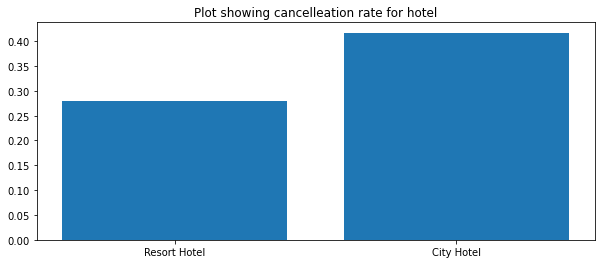



---------------------------------------------------------------------------------------------------------------
Cancellation rate for month column: 
 {7: 0.3611065098558887, 5: 0.3048377695745094, 4: 0.3478959525961635, 6: 0.313452188006483, 3: 0.37515967377419673, 8: 0.23915174195847813, 9: 0.2840047013569826, 1: 0.5705140274901148, 11: 0.3797814207650273, 10: 0.3732311852185669, 12: 0.478515093826489, 2: 0.4611552729199788}


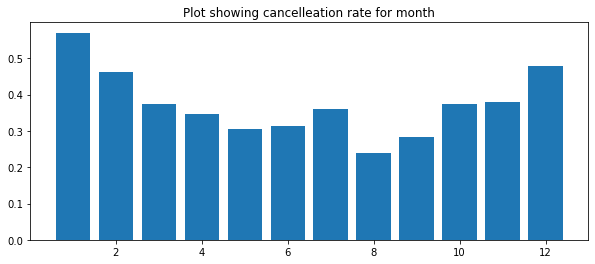



---------------------------------------------------------------------------------------------------------------
Cancellation rate for market_segment column: 
 {'Direct': 0.15424164524421594, 'Corporate': 0.19135198591273722, 'Online TA': 0.3676819970923017, 'Offline TA/TO': 0.3426052402831243, 'Complementary': 0.1226158038147139, 'Groups': 0.6107745127739069, 'Aviation': 0.21940928270042195}


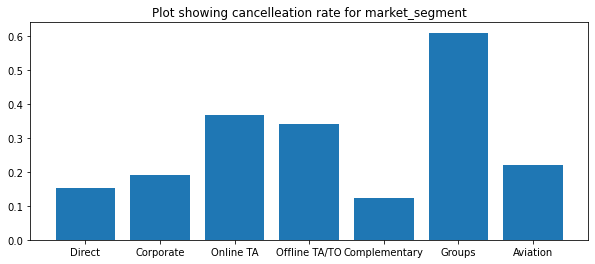



---------------------------------------------------------------------------------------------------------------
Cancellation rate for is_repeated_guest column: 
 {0: 0.3788306644307548, 1: 0.14503415659485025}


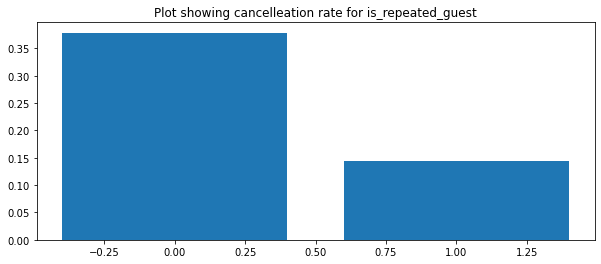



---------------------------------------------------------------------------------------------------------------
Cancellation rate for customer_type column: 
 {'Transient': 0.40885694100232134, 'Contract': 0.3096172718351325, 'Transient-Party': 0.25412712337506976, 'Group': 0.10175438596491228}


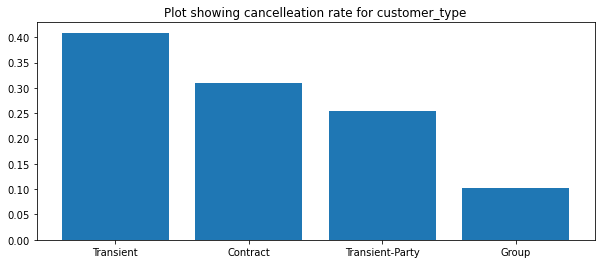



---------------------------------------------------------------------------------------------------------------


In [21]:
# Conducting bivariate analysis for few columns to observe the cancellation rates
columns = ['hotel', 'month', 'market_segment', 'is_repeated_guest', 'customer_type']

for col in columns:

    cancellation = dict()

    for unique_value in data[col].unique():
        cancellation[unique_value] = data[data[col] == unique_value]['is_canceled'].value_counts(normalize = True)[1]
    
    print(f'Cancellation rate for {col} column: \n', cancellation)
    
    plt.figure(figsize = (10,4))
    plt.bar(x = cancellation.keys(), height = cancellation.values())
    plt.title(f'Plot showing cancelleation rate for {col}')
    plt.show()
    
    print('\n\n---------------------------------------------------------------------------------------------------------------')

In [22]:
# Creating new column to find the stay type as Weekend, Weekday or Both

def stay(stays_in_weekend_nights, stays_in_week_nights):
    
    if (stays_in_weekend_nights > 0) & (stays_in_week_nights == 0):
        return 'Weekend'
    elif (stays_in_weekend_nights == 0) & (stays_in_week_nights > 0):
        return 'Weekday'
    elif (stays_in_weekend_nights > 0) & (stays_in_week_nights > 0):
        return 'Both'
    else:
        return 'Not defined'
    
data['stay_type'] = data.apply(lambda x: stay(x.stays_in_weekend_nights, x.stays_in_week_nights), axis = 1)

In [23]:
data['stay_type'].value_counts()

Both           60326
Weekday        50978
Weekend         6892
Not defined      701
Name: stay_type, dtype: int64

Cancellation rate for stay_type column: 
 {'Not defined': 0.037089871611982884, 'Weekday': 0.3812232727843383, 'Both': 0.3782448695421543, 'Weekend': 0.2719094602437609}


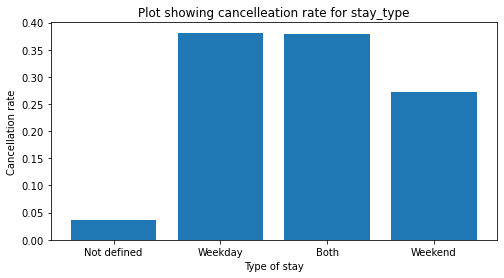

In [24]:
cancellation = dict()

for unique_value in data['stay_type'].unique():
    cancellation[unique_value] = data[data['stay_type'] == unique_value]['is_canceled'].value_counts(normalize = True)[1]
    
print('Cancellation rate for stay_type column: \n', cancellation)
    
plt.figure(figsize = (8,4))
plt.bar(x = cancellation.keys(), height = cancellation.values())
plt.title('Plot showing cancelleation rate for stay_type')
plt.xlabel('Type of stay')
plt.ylabel('Cancellation rate')
plt.show()

{'PRT': 0.5663064731913142, 'GBR': 0.20224255915574244, 'FRA': 0.185693710993759, 'ESP': 0.2540849673202614, 'DEU': 0.16714697406340057, 'ITA': 0.3539564524694636, 'IRL': 0.24651851851851853, 'BEL': 0.20239111870196413, 'BRA': 0.3732014388489209, 'NLD': 0.18393536121673004}


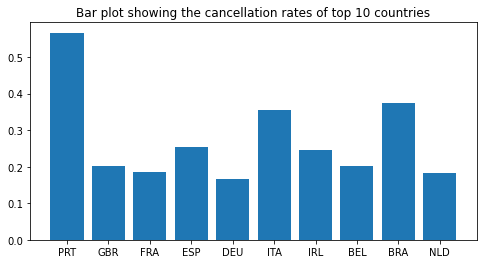

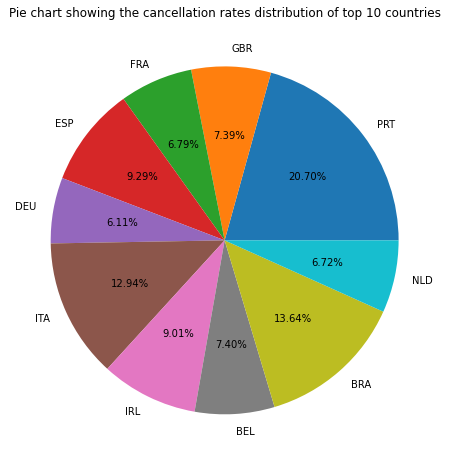

In [25]:
# Comapring the cancellation rates of countries
top_countries = data['country'].value_counts().head(10)
top_countries.index

country_cancellation_rate = dict()
for unique_country in top_countries.index:
    country_cancellation_rate[unique_country] = data[data['country'] == unique_country]['is_canceled'].value_counts(normalize = True)[1]
print(country_cancellation_rate)

# Bar plot showing the cancellation rates of top 10 countries
plt.figure(figsize = (8,4))
plt.bar(country_cancellation_rate.keys(), country_cancellation_rate.values())
plt.title('Bar plot showing the cancellation rates of top 10 countries')

plt.figure(figsize = (14,8))
plt.pie(country_cancellation_rate.values(), labels = country_cancellation_rate.keys(), autopct = '%0.2f%%')
plt.title('Pie chart showing the cancellation rates distribution of top 10 countries')

plt.show()

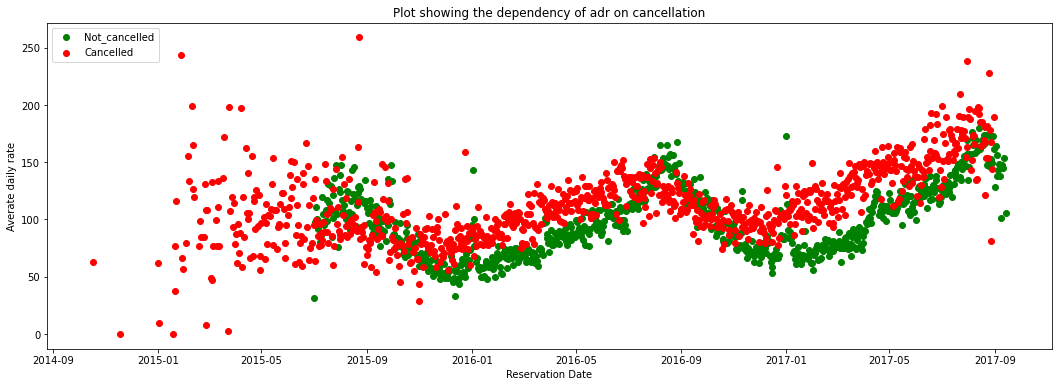

In [26]:
# Finding out the dependency of adr on cancellation
cancelled_data = data[data['is_canceled'] == 1]
cancelled_adr = cancelled_data.groupby(by = 'reservation_status_date')[['adr']].mean()
cancelled_adr.reset_index(inplace = True)
cancelled_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = data[data['is_canceled'] == 0]
not_cancelled_adr = not_cancelled_data.groupby(by = 'reservation_status_date')[['adr']].mean()
not_cancelled_adr.reset_index(inplace = True)
not_cancelled_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (18,6))
plt.scatter(not_cancelled_adr['reservation_status_date'], not_cancelled_adr['adr'], color = 'green')
plt.scatter(cancelled_adr['reservation_status_date'], cancelled_adr['adr'], color = 'red')
plt.legend(['Not_cancelled', 'Cancelled'])
plt.title('Plot showing the dependency of adr on cancellation')
plt.xlabel('Reservation Date')
plt.ylabel('Averate daily rate')
plt.show()

# Conclusions

1. Hotels have observed a cancellation rate of 37.13%, which is excessively high and can cause a significant impact on business. The cancellation rate for the City Hotel is 41.70%, which is considerably higher compared to the Resort Hotel.


2. For the market segment of groups, we have noticed a cancellation rate exceeding 60%.It has been found that repeated guests have a lower likelihood of canceling their bookings, with a cancellation rate of less than 15%.Typically, customers who made bookings for weekdays tend to cancel more often compared to those who made bookings solely for the weekend.


3. The highest cancellation rate was observed in January, with a rate of 57.05%, while the lowest rate was recorded in August at 23.91%. According to the bar graph displaying cancellation rates for countries with the highest bookings, it is evident that Portugal has the highest cancellation rate at 56.63%, followed by Brazil and Italy with cancellation rates of approximately 35%.


4. It is clearly evident from the scatter plot that the Average Daily Rate (ADR) is an influential factor that drives the cancellation rate, as the cancellation rate tends to be higher when the ADR is high.

# Suggestions

1. Since the cancellation rate is influenced by the average daily rate, hotels can focus on refining their pricing strategies for specific properties to minimize cancellations. Additionally, they can offer special discounts to specific customer segments, such as new customers, group bookings, and weekday bookings, as these are the target bookings with higher cancellation rates.


2. Hotels can concentrate on marketing and promotional campaigns for the month of January to boost their revenues, considering the higher cancellation rate during this period. Monthly cancellation rates can be utilised effectively to take further marketing decisions.


3. Hotels should examine the quality of service provided to countries like Portugal, Brazil, and Italy, as they contribute to a high cancellation rate.